In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import wordcloud
import spacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd
import datetime
from tqdm import tqdm

from load_reviews import load_reviews

In [2]:
def map_range(x, x1, x2, y1, y2):
    return y1 + (x - x1) * (y2 - y1) / (x2 - x1)

In [3]:
reviews_ba = load_reviews("../dataset/BeerAdvocate/reviews.txt", max_entries=100000).dropna()
reviews_rb = load_reviews("../dataset/RateBeer/ratings.txt", max_entries=100000).dropna()

reviews_rb['overall'] = reviews_rb['overall'] / 4
reviews_rb['appearance'] = map_range(reviews_rb['appearance'].values, reviews_rb['appearance'].min(), reviews_rb['appearance'].max(), 0, 5)
reviews_rb['aroma'] = map_range(reviews_rb['aroma'].values, reviews_rb['aroma'].min(), reviews_rb['aroma'].max(), 0, 5)
reviews_rb['palate'] = map_range(reviews_rb['palate'].values, reviews_rb['palate'].min(), reviews_rb['palate'].max(), 0, 5)
reviews_rb['taste'] = map_range(reviews_rb['taste'].values, reviews_rb['taste'].min(), reviews_rb['taste'].max(), 0, 5)

# reviews = pd.concat([reviews_ba, reviews_rb], ignore_index=True)
reviews = reviews_ba
reviews = reviews.dropna()

Loading reviews from ../dataset/BeerAdvocate/reviews.txt
Number of lines: None


1699998it [00:01, 1146362.89it/s]


Loading reviews from ../dataset/RateBeer/ratings.txt
Number of lines: None


1699998it [00:01, 1184050.13it/s]


In [4]:
reviews

,beer_id,user_id,date,appearance,abv,aroma,palate,taste,overall,rating,text
26684,305,beeradvocate.1,8.880588e+08,4.0,4.5,4.00,3.50,4.00,4.00,3.95,Presentation: 12oz. clear bottle (wide w/thin ...
68137,19,todd.2,8.889228e+08,5.0,4.9,4.50,5.00,4.50,4.00,4.48,Presentation: Highly prestigious looking label...
16497,79,beeradvocate.1,8.907372e+08,4.0,6.5,4.00,4.50,4.50,4.50,4.35,Presentation: Impressive wide 500ml brown bott...
26475,304,beeradvocate.1,8.921160e+08,4.5,4.8,4.00,4.00,4.00,4.00,4.03,Presentation: 12oz. clear bottle (wide w/thin ...
26396,302,beeradvocate.1,8.933256e+08,3.5,4.5,3.50,3.00,4.00,3.50,3.65,Presentation: 12oz. clear bottle (wide w/thin ...
...,...,...,...,...,...,...,...,...,...,...,...
82020,108464,vinicole.65585,1.500890e+09,4.0,3.6,4.00,3.25,3.75,3.75,3.78,Gravity - Brackley Beer Festival 2017.Labelled...
2614,47581,the_kriek_freak.848244,1.500890e+09,4.0,8.0,4.25,4.50,4.75,4.50,4.51,This is one insanely tasty beer. It pours jet ...
80382,811,emh73.1043324,1.500890e+09,4.0,5.1,3.25,3.00,3.50,3.25,3.37,Pours a clear Amber with a one inch white head...
44673,218932,jazzyjeff13.522501,1.500890e+09,3.5,6.2,3.50,3.50,3.50,3.25,3.45,A 330ml bottle with a BB of Nov 2017. Purchase...


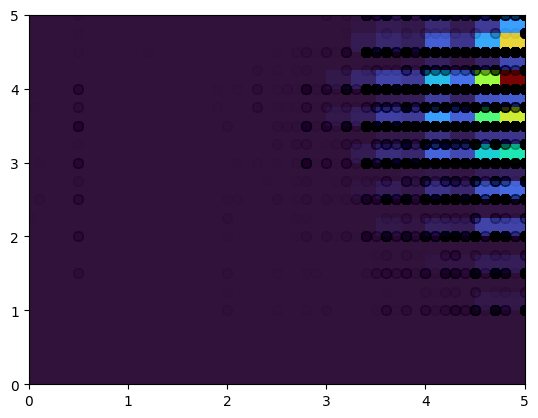

In [11]:
plt.hist2d(reviews['abv'].values, reviews['overall'].values, bins=np.linspace(0, 5, 21), cmap='turbo')
plt.scatter(reviews['abv'].values, reviews['overall'].values, s=50, alpha=0.01, c='black')

In [8]:
reviews["abv"].min()

0.01